# Keras NMF Layer

In this example I'll show how easy it is to set up a basic nonnegative matrix factorization scheme in Tensorflow/Keras that's easy to add regularization to.

In [1]:
import tensorflow.keras as keras
import numpy as np
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [2]:
X = x_train.reshape((1,x_train.shape[0], -1))[:,:5000,:] # Format the first 5000 entries of MNIST
X = X / np.max(X)

In [3]:
import numpy as np
import tensorflow as tf
tf.keras.backend.clear_session()
from tensorflow.keras import layers
import tensorflow.keras.backend as K

class NonnegativeMatrixFactorization(layers.Layer):
    def __init__(self, units, **kwargs):
        self.units = units
        super(NonnegativeMatrixFactorization, self).__init__(**kwargs)
    def build(self, input_shape):
        self.W = self.add_weight(shape=(1, input_shape[1], self.units),
                                      initializer=tf.keras.initializers.RandomUniform(minval=0., maxval=0.1),
                                      name='kernel')
        self.H = self.add_weight(shape=(self.units, input_shape[-1]),
                                      initializer=tf.keras.initializers.RandomUniform(minval=0., maxval=0.1),
                                      name='kernel')
        self.built = True
    def call(self, x):
        o = tf.keras.constraints.non_neg()(self.W) @ (tf.keras.constraints.non_neg()(self.H))
        return tf.square(o-x)
    
# Prepare the model
x = tf.keras.Input(shape=X.shape[1:])
layer = NonnegativeMatrixFactorization(32)
y = layer(x)
model = tf.keras.Model(inputs=x, outputs=y)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer, loss='mse')
# Test the model
history = model.fit(X, X*0., epochs = 10000, batch_size = 1, verbose = 0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Text(0.5, 1.0, 'H')

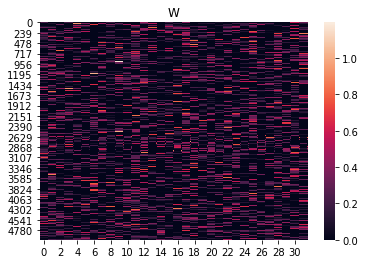

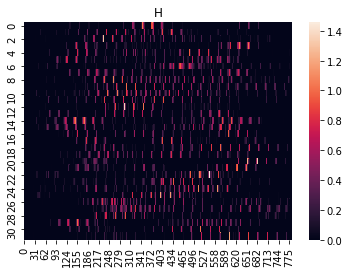

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

W = model.layers[1].W.numpy()[0,:,:]
H = model.layers[1].H.numpy()

plt.figure()
sns.heatmap(np.maximum(0.,W))
plt.title('W')
plt.figure()
sns.heatmap(np.maximum(0.,H))
plt.title('H')

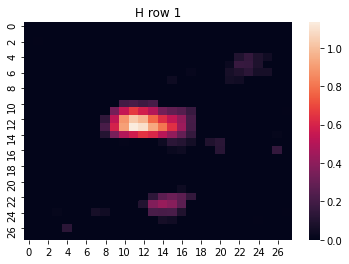

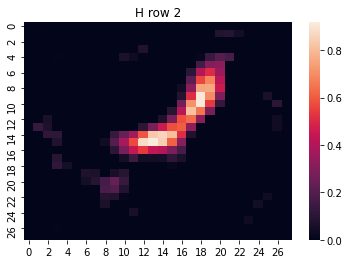

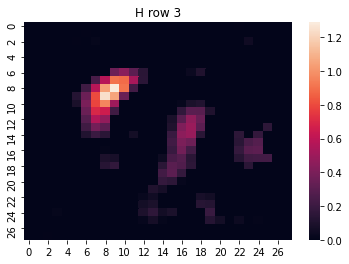

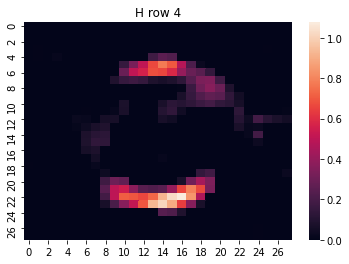

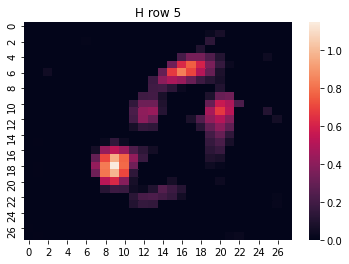

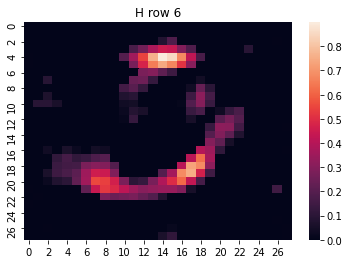

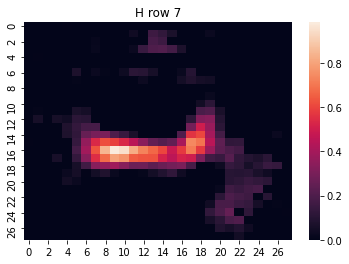

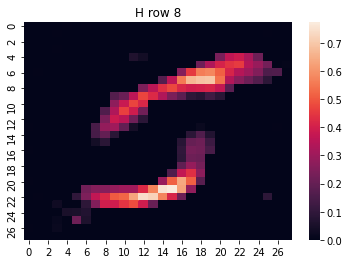

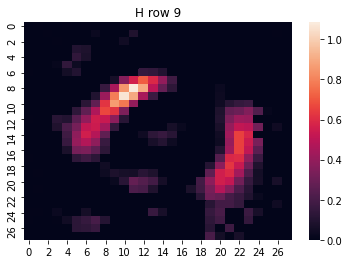

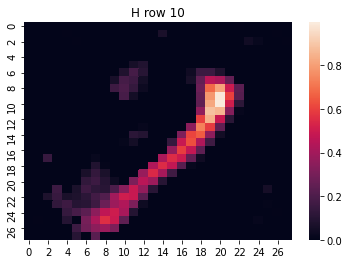

In [5]:
for i in range(10):
    plt.figure()
    sns.heatmap(np.maximum(0.,H[i,:]).reshape((28,28)))
    plt.title('H row {}'.format(i+1))

# Adding l1 Regularization to Weights
Here, we add l1 regularization to the weights so that both matrices are sparse. We can control the weight of the regularization:

In [6]:
import numpy as np
import tensorflow as tf
tf.keras.backend.clear_session()
from tensorflow.keras import layers
import tensorflow.keras.backend as K

class SparseNonnegativeMatrixFactorization(layers.Layer):
    def __init__(self, units, w_regularizer = 0.1, h_regularizer = 0.1, **kwargs):
        self.units = units
        self.w_regularizer = w_regularizer
        self.h_regularizer = h_regularizer
        super(SparseNonnegativeMatrixFactorization, self).__init__(**kwargs)
    def build(self, input_shape):
        self.W = self.add_weight(shape=(1, input_shape[1], self.units),
                                      initializer=tf.keras.initializers.RandomUniform(minval = 0., maxval = 0.1),
                                      name='kernel',
                                      regularizer=tf.keras.regularizers.l1(l1=self.w_regularizer))
        self.H = self.add_weight(shape=(self.units, input_shape[-1]),
                                      initializer=tf.keras.initializers.RandomUniform(minval = 0., maxval = 0.1),
                                      name='kernel',
                                      regularizer=tf.keras.regularizers.l1(l1 = self.h_regularizer))
        self.built = True
    def call(self, x):
        o = tf.keras.constraints.non_neg()(self.W) @ (tf.keras.constraints.non_neg()(self.H))
        return tf.square(o-x)
    
    
# Prepare the model
x = tf.keras.Input(shape=X.shape[1:])
layer = SparseNonnegativeMatrixFactorization(32, w_regularizer = 0.1, h_regularizer = 0.1)
y = layer(x)
model = tf.keras.Model(inputs=x, outputs=y)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer, loss='mse')
# Test the model
history = model.fit(X, X*0., epochs = 10000, batch_size = 1, verbose = 0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Text(0.5, 1.0, 'H')

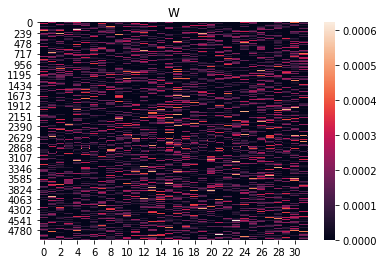

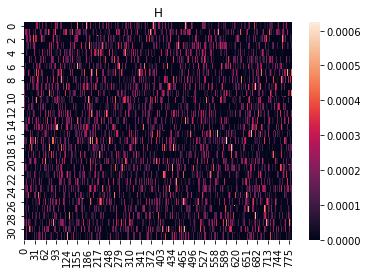

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

W = model.layers[1].W.numpy()[0,:,:]
H = model.layers[1].H.numpy()

plt.figure()
sns.heatmap(np.maximum(0.,W))
plt.title('W')
plt.figure()
sns.heatmap(np.maximum(0.,H))
plt.title('H')

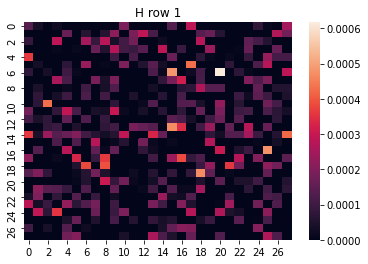

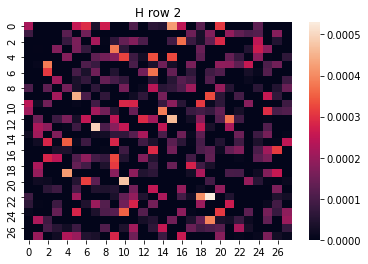

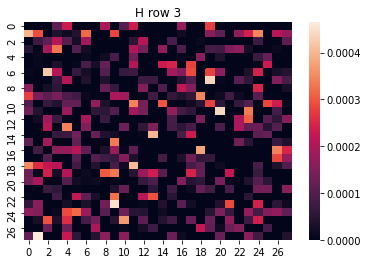

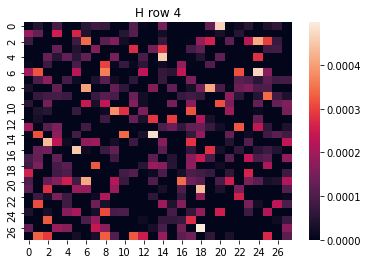

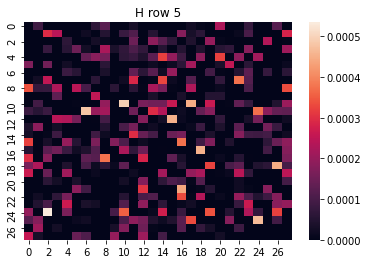

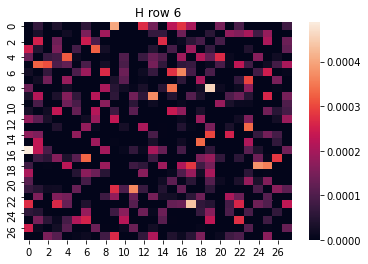

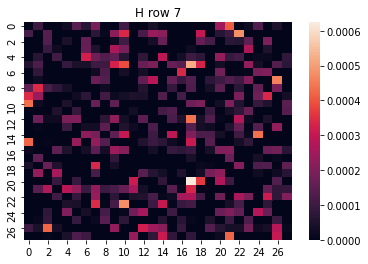

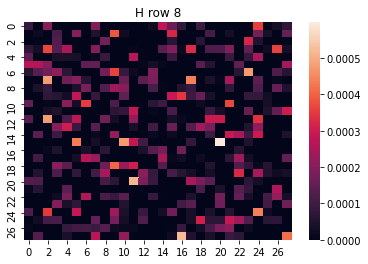

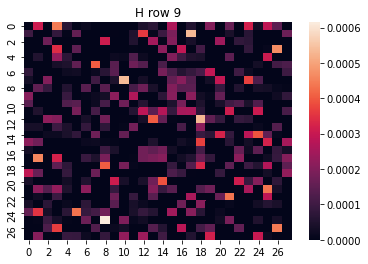

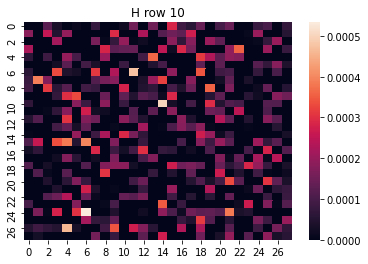

In [8]:
for i in range(10):
    plt.figure()
    sns.heatmap(np.maximum(0.,H[i,:]).reshape((28,28)))
    plt.title('H row {}'.format(i+1))